In [1]:
# Please use the following code to visualize your predictions before submission
# You should have already validated the prediction format using validate_prediction_format.

In [2]:
import sys
sys.path.append('..')
from util.eval_util import validate_pred_format
from util.dataset_util import read_video, read_cam_params, project_3d_to_2d, plot_over_image
from util.eval_util import load_data

In [3]:
data_template_path = '../../datasets/chi3d/template.json' # template file
data_pred_path = '../../datasets/chi3d/template.json'  # prediction file to be submitted; replace this with your prediction

In [4]:
dataset_path = '../../datasets/chi3d/'
subset = 'test'
subj_name = 's01'
action_name = 'Grab 1'
person_id = 0 # 0 or 1 in chi3d, which requires 2 person predictions and 0 in humansc3d and fit3d

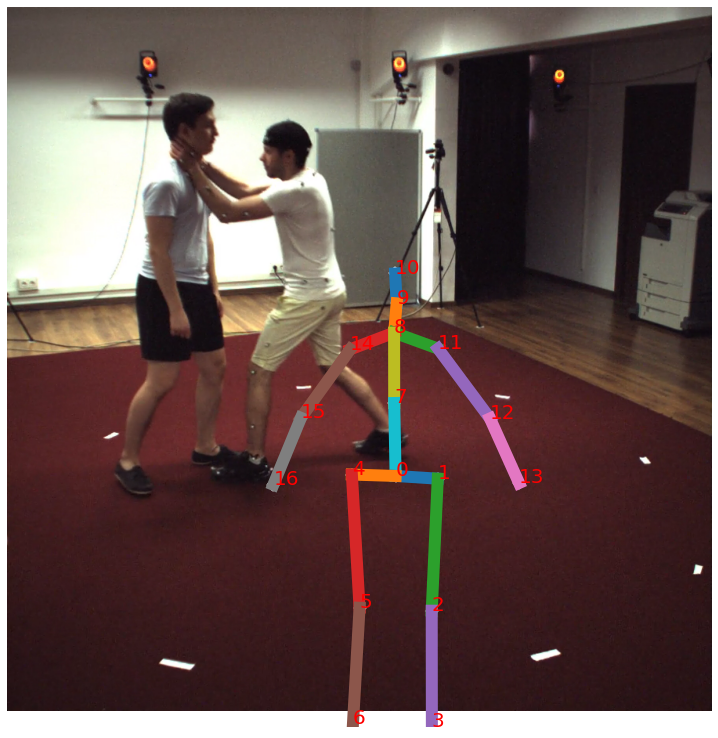

In [5]:
data = load_data(data_pred_path)
vid_path = dataset_path + subset + "/" + subj_name + "/videos/" + action_name + '.mp4'
video = read_video(vid_path)
cam_path = dataset_path + subset + "/" + subj_name + "/camera_parameters/" + action_name + '.json'
cam_params = read_cam_params(cam_path)
frame_id = data[subj_name][action_name]['other']['contact_fr_id']
image_id = data[subj_name][action_name]['other']['video_fr_ids'].index(frame_id)
frame = video[frame_id]
j3d = data[subj_name][action_name]['persons'][person_id]['joints3d']['joints3d'][image_id]
j2d = project_3d_to_2d(j3d, cam_params['intrinsics_wo_distortion'], 'wo_distortion')
plot_over_image(frame, j2d)